# Regression & Its Evaluation | **Assignment**

**Question 1: What is Simple Linear Regression?**

Answer : Simple lilnear relation attempts to determine the strenghth and characteristics of the relationship between one independent variable(x) and another dependent variable (y).

Eg; Predict the price of house based on area of house.

**Question 2: What are the key assumptions of Simple Linear Regression?**

Answer : Key Assumptions of Simple Linear Regression

1. Linearity

The relationship between the independent variable (X) and the dependent variable (Y) is linear.

2. Independence of Errors

Residuals (errors) are independent of each other. This means no autocorrelation exists in the error terms.

3. Homoscedasticity (Constant Variance of Errors)

The variance of residuals is constant across all levels of the independent variable.

4. Normality of Errors

The residuals are normally distributed, especially important for hypothesis testing and confidence intervals.

5. No Perfect Multicollinearity (for multiple regression, but in simple regression this reduces to:)

The independent variable is not a constant and has variability.

6. No Measurement Error in Independent Variable

The predictor variable (X) is measured accurately without error.


**Question 3: What is heteroscedasticity, and why is it important to address in regression
models?**

Answer : Heteroscedasticity occurs when the variance of the error terms (residuals) is not constant across all values of the independent variable(s).

In other words, the spread of residuals increases or decreases as the predictor changes.

This violates the homoscedasticity assumption of linear regression.

**Why It Is Important to Address**

1. Unreliable Hypothesis Testing

Standard errors of coefficients become biased.

This leads to incorrect t-tests and F-tests, causing false conclusions about variable significance.

2. Inefficient Estimates

Ordinary Least Squares (OLS) estimates remain unbiased, but they are no longer the Best Linear Unbiased Estimators (BLUE).

This reduces the efficiency of the regression model.

3. Misleading Predictions

Confidence intervals and prediction intervals become inaccurate.

Predictions for some ranges of data may be less reliable.

**Question 4: What is Multiple Linear Regression?**

Answer : Multiple Linear Regression is a statistical technique used to model the relationship between one dependent variable (Y) and two or more independent variables (X₁, X₂, …, Xₙ). It extends simple linear regression (which has only one predictor) to include multiple predictors.

**Question 5: What is polynomial regression, and how does it differ from linear
regression?**

Answer : Polynomial Regression is a type of regression analysis where the relationship between the independent variable(s)
𝑋
X and the dependent variable
𝑌
Y is modeled as an nth-degree polynomial.
It is an extension of linear regression that allows for curved (non-linear) relationships.

Example:

*  Linear Regression: Predicting salary based only on years of experience (straight-line growth).

*  Polynomial Regression: Predicting salary where growth first increases rapidly, then slows down (curved trend).

Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data:

 ● X = [1, 2, 3, 4, 5]

 ● Y = [2.1, 4.3, 6.1, 7.9, 10.2]

Equation of line: Y = 0.18 + 1.98X


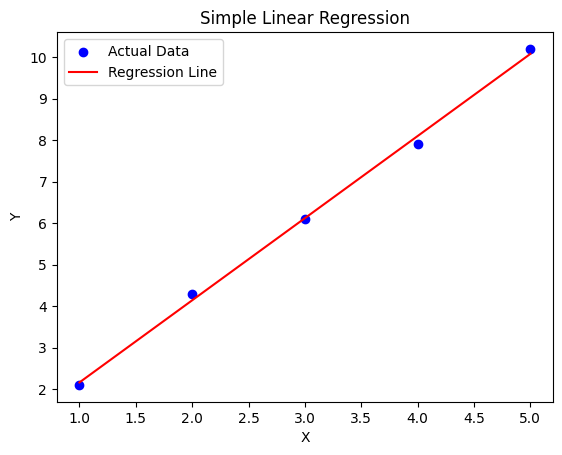

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = [1, 2, 3, 4, 5]
Y = [2.1, 4.3, 6.1, 7.9, 10.2]

# Reshape X for sklearn (2D array required)
X = np.array(X).reshape(-1, 1)
Y = np.array(Y)

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Get slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

print(f"Equation of line: Y = {intercept:.2f} + {slope:.2f}X")

# Predictions
Y_pred = model.predict(X)

# Plot data points and regression line
plt.scatter(X, Y, color="blue", label="Actual Data")
plt.plot(X, Y_pred, color="red", label="Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


Question 7: Fit a Multiple Linear Regression model on this sample data:

● Area = [1200, 1500, 1800, 2000]

● Rooms = [2, 3, 3, 4]

● Price = [250000, 300000, 320000, 370000]

Check for multicollinearity using VIF and report the results.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data
Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]

# Create DataFrame
data = pd.DataFrame({
    "Area": Area,
    "Rooms": Rooms,
    "Price": Price
})

# Independent and dependent variables
X = data[["Area", "Rooms"]]
y = data["Price"]

# Fit Multiple Linear Regression
model = LinearRegression()
model.fit(X, y)

# Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(X.columns, model.coef_)))

# ----------------------------
# Check Multicollinearity (VIF)
# ----------------------------
# Add constant for statsmodels
X_with_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(X_with_const.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Question 8: Implement polynomial regression on the following data:


● X = [1, 2, 3, 4, 5]
3


● Y = [2.2, 4.8, 7.5, 11.2, 14.7]


Fit a 2nd-degree polynomial and plot the resulting curve.

Polynomial Regression Results:
Equation: y = 0.0600 + 1.9400x + 0.2000x²
Coefficients: [0.   1.94 0.2 ]
Intercept: 0.06000000000000938
R-squared: 0.9993


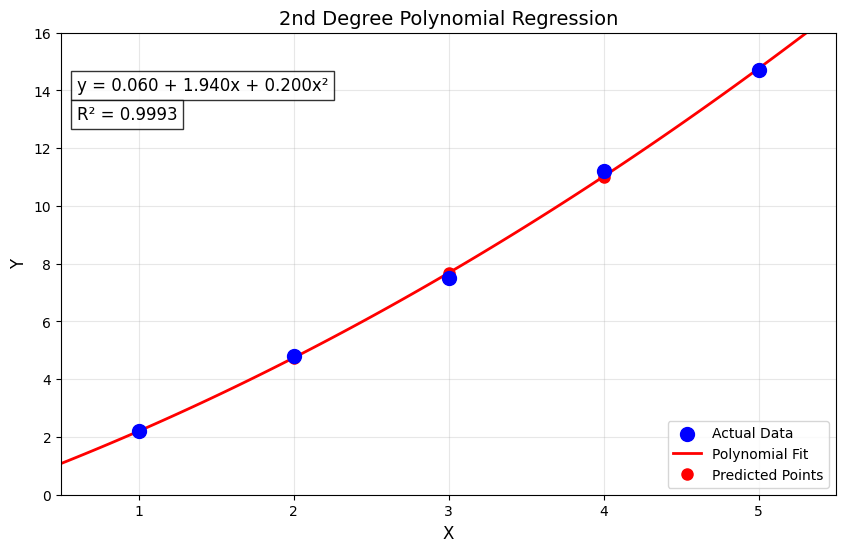


Detailed Results:
X=1: Actual=2.20, Predicted=2.20, Error=0.00
X=2: Actual=4.80, Predicted=4.74, Error=0.06
X=3: Actual=7.50, Predicted=7.68, Error=0.18
X=4: Actual=11.20, Predicted=11.02, Error=0.18
X=5: Actual=14.70, Predicted=14.76, Error=0.06


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Given data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features (2nd degree)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Polynomial Regression Results:")
print(f"Equation: y = {intercept:.4f} + {coefficients[1]:.4f}x + {coefficients[2]:.4f}x²")
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

# Make predictions
Y_pred = model.predict(X_poly)

# Calculate R-squared
r2 = r2_score(Y, Y_pred)
print(f"R-squared: {r2:.4f}")

# Create smooth curve for plotting
X_smooth = np.linspace(0.5, 5.5, 100).reshape(-1, 1)
X_smooth_poly = poly.transform(X_smooth)
Y_smooth = model.predict(X_smooth_poly)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', s=100, label='Actual Data', zorder=5)
plt.plot(X_smooth, Y_smooth, color='red', linewidth=2, label='Polynomial Fit')
plt.plot(X, Y_pred, 'ro', markersize=8, label='Predicted Points')

# Add equation to plot
equation_text = f'y = {intercept:.3f} + {coefficients[1]:.3f}x + {coefficients[2]:.3f}x²'
plt.text(0.6, 14, equation_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.6, 13, f'R² = {r2:.4f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('2nd Degree Polynomial Regression', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0.5, 5.5)
plt.ylim(0, 16)
plt.show()

# Print detailed results
print("\nDetailed Results:")
for i, (x, y_actual, y_pred) in enumerate(zip(X.flatten(), Y, Y_pred)):
    print(f"X={x}: Actual={y_actual:.2f}, Predicted={y_pred:.2f}, Error={abs(y_actual-y_pred):.2f}")

Question 9: Create a residuals plot for a regression model trained on this data:

● X = [10, 20, 30, 40, 50]

● Y = [15, 35, 40, 50, 65]

Assess heteroscedasticity by examining the spread of residuals.


Linear Regression Results:
Equation: y = 6.50 + 1.15x
R-squared: 0.9653


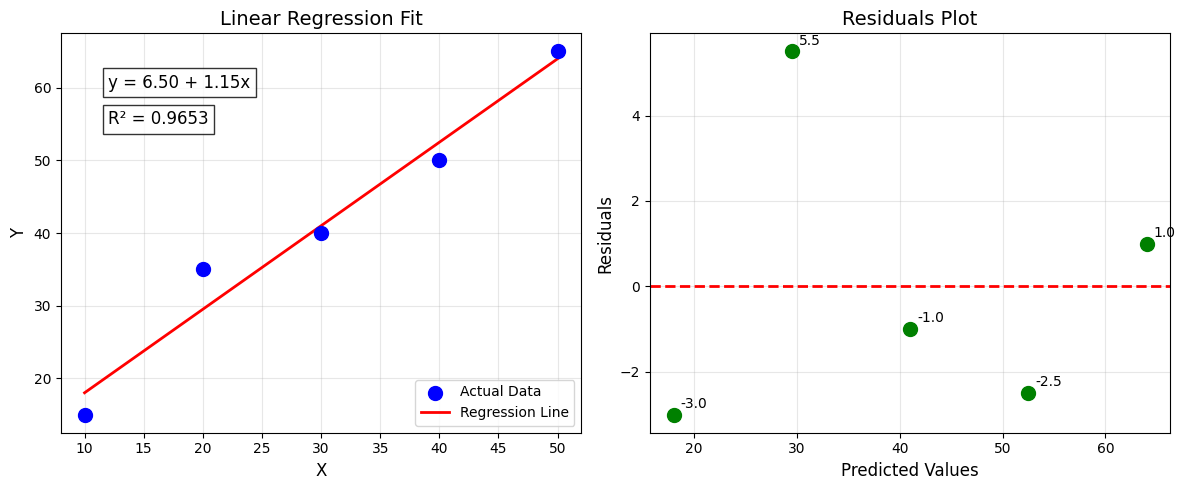


Residuals Analysis:
Residuals: [-3.   5.5 -1.  -2.5  1. ]
Mean of residuals: 0.0000
Standard deviation of residuals: 3.0822
Absolute residuals: [3.  5.5 1.  2.5 1. ]
Mean absolute residual: 2.6000

Heteroscedasticity Assessment:
Examining the spread of residuals across predicted values:
Overall variance of residuals: 9.5000
Residual magnitudes: [3.  5.5 1.  2.5 1. ]
⚠️  Potential heteroscedasticity detected: Residual magnitudes vary significantly


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Given data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit linear regression model
model = LinearRegression()
model.fit(X, Y)

# Make predictions
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Get model parameters
slope = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(Y, Y_pred)

print("Linear Regression Results:")
print(f"Equation: y = {intercept:.2f} + {slope:.2f}x")
print(f"R-squared: {r2:.4f}")

# Create the residuals plot
plt.figure(figsize=(12, 5))

# Main plot with regression line
plt.subplot(1, 2, 1)
plt.scatter(X, Y, color='blue', s=100, label='Actual Data', zorder=5)
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression Line')

# Add equation to plot
equation_text = f'y = {intercept:.2f} + {slope:.2f}x'
plt.text(12, 60, equation_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(12, 55, f'R² = {r2:.4f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('Linear Regression Fit', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()

# Residuals plot
plt.subplot(1, 2, 2)
plt.scatter(Y_pred, residuals, color='green', s=100, zorder=5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals Plot', fontsize=14)
plt.grid(True, alpha=0.3)

# Add residual values as annotations
for i, (pred, resid) in enumerate(zip(Y_pred, residuals)):
    plt.annotate(f'{resid:.1f}', (pred, resid), xytext=(5, 5),
                textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

# Statistical analysis of residuals
print("\nResiduals Analysis:")
print(f"Residuals: {residuals}")
print(f"Mean of residuals: {np.mean(residuals):.4f}")
print(f"Standard deviation of residuals: {np.std(residuals):.4f}")
print(f"Absolute residuals: {np.abs(residuals)}")
print(f"Mean absolute residual: {np.mean(np.abs(residuals)):.4f}")

# Check for heteroscedasticity
print("\nHeteroscedasticity Assessment:")
print("Examining the spread of residuals across predicted values:")

# Calculate variance of residuals in different regions
# Since we have only 5 points, we'll look at the pattern
residual_variance = np.var(residuals)
print(f"Overall variance of residuals: {residual_variance:.4f}")

# Look for patterns in residual magnitudes
residual_magnitudes = np.abs(residuals)
print("Residual magnitudes:", residual_magnitudes)

# Assess pattern visually and statistically
if max(residual_magnitudes) > 2 * min(residual_magnitudes):
    print("⚠️  Potential heteroscedasticity detected: Residual magnitudes vary significantly")
else:
    print("✓ Residual magnitudes appear relatively constant (homoscedastic)")

Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.

Answer :

*  Step 1: Confirm and Diagnose the Issues
For Heteroscedasticity:


Create residuals vs. fitted values plot (looking for funnel shape)

Perform Breusch-Pagan or White test for formal statistical confirmation

Examine if variance increases with luxury properties or specific locations

**For Multicollinearity:**

Calculate Variance Inflation Factor (VIF) for each feature

Examine correlation matrix (especially between area, rooms, and location-based features)

Check condition number of the feature matrix

*  Step 2: Address Heteroscedasticity

Data Transformation Approaches:

*  Modeling Approaches:

Weighted Least Squares (WLS): Weight observations inversely to their variance

Robust regression methods (Huber regression, RANSAC)

Generalized Least Squares (GLS) with appropriate error structure

*  Feature Engineering:

Create price per square foot as an alternative target

Use location-based clustering to create homogeneous groups

**Step 3: Address Multicollinearity**

Feature Selection and Engineering:

Dimensionality Reduction:
Principal Component Analysis (PCA) to create orthogonal components

Partial Least Squares (PLS) regression

Feature clustering to group correlated variables

Regularization Techniques:
Ridge Regression (L2 regularization) - handles multicollinearity well

Lasso Regression (L1 regularization) - can eliminate some features entirely

Elastic Net - combination of L1 and L2 regularization

**Step 4: Domain-Specific Solutions for Real Estate**

Handle Location Multicollinearity:

Instead of using raw coordinates, use distance-based features (distance to CBD, schools, parks)

Create location clusters using k-means or DBSCAN

Use spatial fixed effects by creating dummy variables for neighborhoods

Address Area-Rooms Correlation:

Create interaction terms: area × rooms

Use ratio features: price per room, rooms per square foot

Polynomial features to capture non-linear relationships

**Step 5: Model Validation and Selection**

Cross-Validation Strategy:

Performance Metrics:

RMSE and MAE for error magnitude

R² for explanatory power

MAPE for percentage error

Residual diagnostics to confirm issue resolution

**Step 6: Implementation Plan**

Immediate Actions:

Apply log transformation to house prices

Remove features with VIF > 10

Implement ridge regression as baseline

Create location clusters instead of raw coordinates

Medium-term Improvements:

Develop spatial autoregressive models

Implement hierarchical modeling for different property types

Create market segment-specific models

Monitoring and Maintenance:
Continuous residual monitoring for heteroscedasticity

Regular VIF checks for new features

Model performance tracking across different price segments

**Step 7: Business Communication
To Stakeholders:**

"We've identified statistical issues that could affect price predictions, particularly for luxury properties"

"Our solutions will provide more reliable estimates across all market segments"

"The improved model will be especially valuable for portfolio valuation and risk assessment"

Expected Outcomes:

More reliable predictions across all price ranges

Better confidence intervals for valuation

Improved model interpretability for business decisions

By systematically addressing both heteroscedasticity and multicollinearity, we'll develop a robust model that provides accurate, reliable price predictions across the entire real estate market spectrum.

